## **NJ Transit Fall 2019**


This notebook covers  performance data for the New Jersey transit September to November 2019.

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
downloads_folder = os.path.expanduser('~/Downloads')

file_path_1 = os.path.join(downloads_folder, '2019_09.csv')

df_09 = pd.read_csv(file_path_1)

In [3]:
file_path_2 =  os.path.join(downloads_folder, '2019_10.csv')
df_10 = pd.read_csv(file_path_2)

In [4]:
file_path_3 = os.path.join(downloads_folder, '2019_11.csv')
df_11 = pd.read_csv(file_path_3)

In [5]:
df = pd.concat([df_09, df_10, df_11], ignore_index=True)

In [6]:
df.head()

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
0,2019-09-01,7824,1.0,Trenton,148.0,Trenton,148.0,2019-09-01 09:59:00,2019-09-01 10:00:10,1.166667,departed,Northeast Corrdr,NJ Transit
1,2019-09-01,7824,2.0,Trenton,148.0,Hamilton,32905.0,2019-09-01 10:05:00,2019-09-01 10:04:10,0.000000,departed,Northeast Corrdr,NJ Transit
2,2019-09-01,7824,3.0,Hamilton,32905.0,Princeton Junction,125.0,2019-09-01 10:12:00,2019-09-01 10:12:01,0.016667,departed,Northeast Corrdr,NJ Transit
3,2019-09-01,7824,4.0,Princeton Junction,125.0,New Brunswick,103.0,2019-09-01 10:29:00,2019-09-01 10:31:05,2.083333,departed,Northeast Corrdr,NJ Transit
4,2019-09-01,7824,5.0,New Brunswick,103.0,Edison,38.0,2019-09-01 10:34:00,2019-09-01 10:37:40,3.666667,departed,Northeast Corrdr,NJ Transit


In [7]:
type_counts = df['type'].value_counts()
print(type_counts)
line_counts = df['line'].value_counts()
print(line_counts)
print('This shows')

NJ Transit    690170
Amtrak         38239
Name: type, dtype: int64
Northeast Corrdr             111626
Morristown Line              109686
No Jersey Coast              109338
Main Line                     61796
Montclair-Boonton             58821
Raritan Valley                57509
Bergen Co. Line               56960
Gladstone Branch              55315
Pascack Valley                44268
Atl. City Line                18331
Amtrak                        12090
REGIONAL                      10667
Princeton Shuttle              6412
ACELA EXPRESS                  6257
KEYSTONE                       5207
PENNSYLVANIAN                   728
CRESCENT                        685
SILVER STAR  -R                 612
SILVER METEOR-R                 605
CAROLINIAN                      585
AMTRAK                          376
VERMONTER    -R                 252
Meadowlands Rail                108
AMTRAK REGIONAL                  76
Palmetto                         36
Regional                         

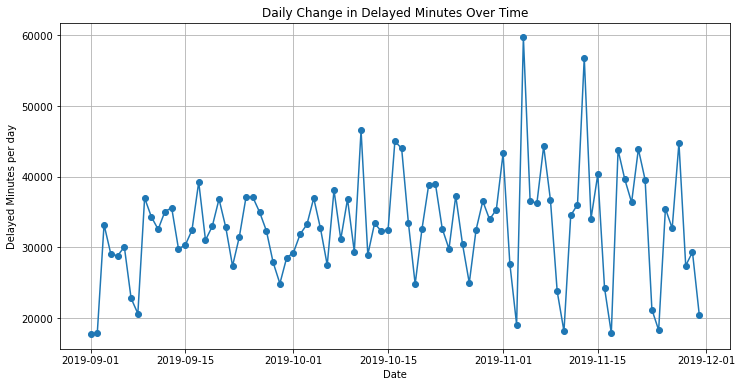

In [8]:
import matplotlib.pyplot as plt


# Assuming df is your DataFrame with the data
# Make sure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by date
df.sort_values(by='date', inplace=True)

# Group by date and calculate the sum of delayed minutes for each day
daily_delays = df.groupby('date')['delay_minutes'].sum().reset_index()

# Create a new column to calculate the daily difference in delayed minutes
#daily_delays['daily_difference'] = daily_delays['delay_minutes'].diff()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_delays['date'], daily_delays['delay_minutes'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Delayed Minutes per day')
plt.title('Daily Change in Delayed Minutes Over Time')
plt.grid(True)
plt.show()

In [9]:
print(daily_delays.mean())
print(daily_delays.median())

delay_minutes    32938.811172
dtype: float64
delay_minutes    32720.616667
dtype: float64


<ipython-input-9-336222905991>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(daily_delays.mean())
<ipython-input-9-336222905991>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(daily_delays.median())


In [10]:

# Group by day and sum the delayed minutes
#daily_delays = df.groupby(df['actual_time'].dt.date)['delay_minutes'].sum()

# Sort in descending order to see the day with the most delayed minutes first
df_sorted = daily_delays.sort_values(by="delay_minutes", ascending=False)

# Print the sorted data
print(df_sorted)

         date  delay_minutes
64 2019-11-04   59712.916667
73 2019-11-13   56863.700000
40 2019-10-11   46552.416667
45 2019-10-16   45017.416667
87 2019-11-27   44790.866667
..        ...            ...
84 2019-11-24   18302.316667
70 2019-11-10   18146.966667
77 2019-11-17   17891.700000
1  2019-09-02   17872.616667
0  2019-09-01   17763.950000

[91 rows x 2 columns]


This observation underscores that November 4th stood out as the day with the highest number of delays during the fall season. This aligns with the fact that on November 4th, a Monday Night Football game took place at Metlife Stadium, resulting in a significant increase in ridership on NJ Transit and consequently more delays.

In [11]:
#Now compare the delay longest delay overall
longest_delay = df[df['delay_minutes'] == df['delay_minutes'].max()]
print(longest_delay)

             date train_id  stop_sequence         from  from_id           to  \
124926 2019-09-17     5422            6.0     Dunellen     36.0   Plainfield   
124925 2019-09-17     5422            5.0  Bound Brook     21.0     Dunellen   
124923 2019-09-17     5422            3.0   Somerville    138.0  Bridgewater   
124924 2019-09-17     5422            4.0  Bridgewater     24.0  Bound Brook   
124922 2019-09-17     5422            2.0      Raritan    129.0   Somerville   

        to_id       scheduled_time          actual_time  delay_minutes  \
124926  120.0  2019-09-17 07:59:00  2019-09-17 12:58:00          299.0   
124925   36.0  2019-09-17 07:54:00  2019-09-17 12:53:00          299.0   
124923   24.0  2019-09-17 07:45:00  2019-09-17 12:44:00          299.0   
124924   21.0  2019-09-17 07:48:00  2019-09-17 12:47:00          299.0   
124922  138.0  2019-09-17 07:40:00  2019-09-17 12:39:00          299.0   

           status            line        type  
124926  estimated  Raritan

A single delay in the dataset extended up to 5 hours in duration. Notably, on the morning of September 17th, there were five consecutive stops, all belonging to the Raritan Valley Line, that experienced this extended delay periodops that happened in the morning of September 17th and were all part of the Raritan Valley Line.

In [12]:

# Filter the DataFrame to include only rows where delay_minutes > 2
filtered_df = df[df['delay_minutes'] > 3]

# Calculate the percentage of rows where delay_minutes > 2
percentage_greater_than_3 = (len(filtered_df) / len(df)) * 100

print(f"The percentage of trips that were delayed (delay_minutes > 3 minutes) is: {percentage_greater_than_3:.3f}%")

The percentage of trips that were delayed (delay_minutes > 3 minutes) is: 44.536%


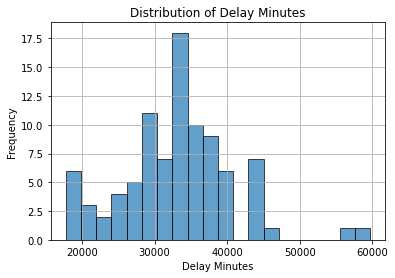

In [13]:
# Create a histogram
df['date'] = pd.to_datetime(df['date'])
daily_delay = df.groupby('date')['delay_minutes'].sum().reset_index()
# Then, group the DataFrame by 'date' and calculate the sum of 'delay_minutes'
daily_delay = df.groupby('date')['delay_minutes'].sum().reset_index()
delayed_minutes = daily_delay['delay_minutes']
plt.hist(delayed_minutes, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Delay Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Delay Minutes')
plt.grid(True)

# Show the plot
plt.show()

This chart shows that unsurpisingly the vast majority of trips were

In [14]:
line_delay_totals = df.groupby('line')['delay_minutes'].sum()
line_delay_totals_sorted = line_delay_totals.sort_values(ascending=False)
#print(line_delay_totals_sorted)
line_counts = df['line'].value_counts()
line_delays = line_delay_totals/line_counts
print(line_delays)

ACELA EXPRESS                 0.000000
AMTRAK                        0.000000
AMTRAK REGIONAL               0.000000
Acela Express                 0.000000
Amtrak                        0.000000
Atl. City Line               15.370973
Bergen Co. Line               4.067406
CAROLINIAN                    0.000000
CRESCENT                      0.000000
Gladstone Branch              3.950024
KEYSTONE                      0.000000
Main Line                     4.026956
Meadowlands Rail              0.000000
Montclair-Boonton             4.434502
Morristown Line               4.764942
No Jersey Coast               4.203681
Northeast Corrdr              3.809969
PENNSYLVANIAN                 0.000000
Palmetto                      0.000000
Pascack Valley                3.625073
Princeton Shuttle             0.380989
REGIONAL                      0.000000
Raritan Valley                3.222472
Regional                      0.000000
SILVER METEOR-R               0.000000
SILVER STAR  -R          

This illustrates that there weren't any lines that were more delayed than the rest.

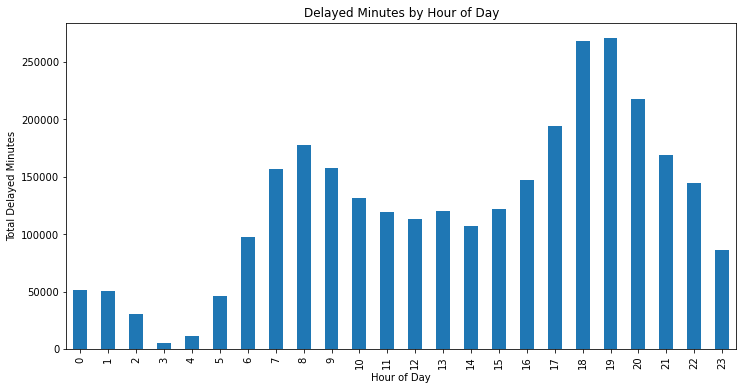

In [15]:
df['actual_time'] = pd.to_datetime(df['actual_time'])
df['hour_of_day'] = df['actual_time'].dt.hour
hourly_delay_totals = df.groupby('hour_of_day')['delay_minutes'].sum()

hourly_delay_totals.plot(kind='bar', figsize=(12, 6))
plt.title('Delayed Minutes by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Delayed Minutes')
plt.show()

This charts shows that delays peaked during hour between 5:00 and 8:00 PM

In [16]:
# Group the data by "from" and "to" columns and calculate the sum of delayed minutes
delayed_minutes_by_route = df.groupby(['from', 'to'])['delay_minutes'].sum()

# Find the combination with the highest total delayed minutes
max_delayed_route = delayed_minutes_by_route.idxmax()
max_delayed_minutes = delayed_minutes_by_route.max()

print(f"The route with the highest delayed minutes is from {max_delayed_route[0]} to {max_delayed_route[1]} with {max_delayed_minutes} minutes of delay.")


The route with the highest delayed minutes is from Newark Penn Station to Secaucus Upper Lvl with 45155.15000000013 minutes of delay.


In [17]:
# Sort the delayed_minutes_by_route Series in descending order
delayed_minutes_by_route_sorted = delayed_minutes_by_route.sort_values(ascending=False)

# Display the sorted data
print(delayed_minutes_by_route_sorted)


from                   to                   
Newark Penn Station    Secaucus Upper Lvl       45155.150000
New York Penn Station  Secaucus Upper Lvl       38733.750000
Secaucus Upper Lvl     New York Penn Station    35756.000000
Newark Penn Station    Newark Airport           30197.650000
Secaucus Upper Lvl     Newark Penn Station      29408.266667
                                                    ...     
Maplewood              Short Hills                  0.000000
                       Highland Avenue              0.000000
Pennsauken             Hammonton                    0.000000
                       Lindenwold                   0.000000
Highland Avenue        Millburn                     0.000000
Name: delay_minutes, Length: 606, dtype: float64


In [18]:
pip install networkx


Note: you may need to restart the kernel to use updated packages.


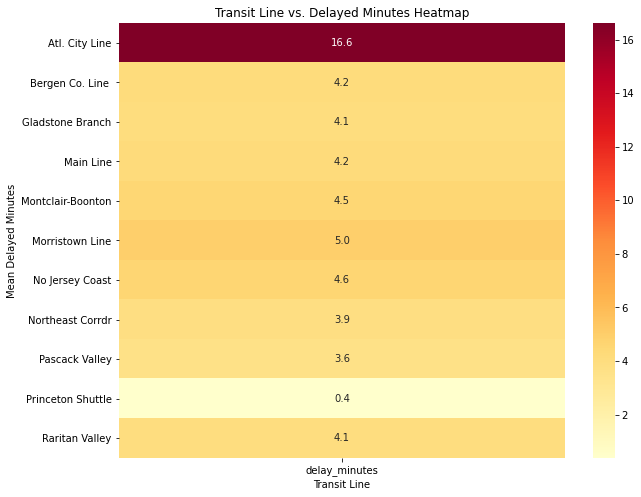

In [19]:
# Create a pivot table to summarize delay by line
import seaborn as sns
heatmap_data = df.pivot_table(index='line', values='delay_minutes', aggfunc='mean')

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Transit Line vs. Delayed Minutes Heatmap')
plt.xlabel('Transit Line')
plt.ylabel('Mean Delayed Minutes')
plt.show()

This heat map illustrates some consistentcy that the average is delay across every is around 4 minutes. The exceptions are ATL City Line which had by far the longest delays averaging out to 16 minutes, and the Princeton Shuttle which averages out to only only 20 senconds

In [20]:
# Get the current working directory
current_directory = os.getcwd()

# Get the name of the Jupyter Notebook
notebook_name = "NJ Transit.ipynb"  # Replace with your notebook's name

# Create the full path to the notebook
notebook_path = os.path.join(current_directory, notebook_name)

# Print the notebook's full path
print("The notebook is located at:", notebook_path)


The notebook is located at: /Users/zacktobin/NJ Transit.ipynb
